In [1]:
import torch
from torch.optim import Adam
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit
from causememaybe.cevae import CEVAE, Model

In [2]:
N = 1000
sigma_0 = 3
sigma_1 = 5
Z = np.random.binomial(1, 0.5, size=(N))
X = np.random.normal(loc=Z, scale=(Z*sigma_1**2 + (1-Z)*sigma_0**2))
T = np.random.binomial(1, 0.75*Z + 0.25*(1-Z))
Y = np.random.binomial(1, expit( 3*(Z + 2*(2*T-1))))

def sample_batch(z, x, t, y):
    ind = np.random.randint(0, len(z), size=16)
    return (i[ind, None].astype(np.float32) for i in [z, x, t, y])

cevae = CEVAE(features_dim=1, latent_confounder_dim=1, treatment_dim=1, outcome_dim=1)

optimizer = Adam(cevae.parameters())

In [3]:
def update():
    optimizer.zero_grad()
    z, x, t, y = sample_batch(Z, X, T, Y)
    x, t, y = torch.from_numpy(x), torch.from_numpy(t), torch.from_numpy(y)
    distributions = cevae(x, t, y)
    
    loss = cevae.loss(distributions, x, t, y, negative_sampling=False)
    
    loss.backward()
    optimizer.step()
    return loss, distributions

In [4]:
losses = []
for i in tqdm(range(100)):
    l, dists = update()
    losses.append(l)

100%|██████████| 100/100 [00:00<00:00, 238.76it/s]


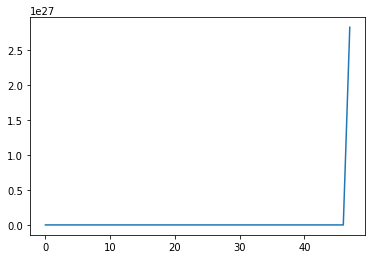

In [5]:
plt.plot(range(len(losses)), losses)

In [6]:
losses

[tensor(583788.0625, grad_fn=<MulBackward0>),
 tensor(343.1842, grad_fn=<MulBackward0>),
 tensor(34617.4922, grad_fn=<MulBackward0>),
 tensor(6.7275e+08, grad_fn=<MulBackward0>),
 tensor(34347.8711, grad_fn=<MulBackward0>),
 tensor(1.4287e+10, grad_fn=<MulBackward0>),
 tensor(15348.6914, grad_fn=<MulBackward0>),
 tensor(38222.1484, grad_fn=<MulBackward0>),
 tensor(172679.5000, grad_fn=<MulBackward0>),
 tensor(20010.8516, grad_fn=<MulBackward0>),
 tensor(148658.1562, grad_fn=<MulBackward0>),
 tensor(74800472., grad_fn=<MulBackward0>),
 tensor(11405.3320, grad_fn=<MulBackward0>),
 tensor(3945.9778, grad_fn=<MulBackward0>),
 tensor(2305815., grad_fn=<MulBackward0>),
 tensor(55539488., grad_fn=<MulBackward0>),
 tensor(6.8022e+09, grad_fn=<MulBackward0>),
 tensor(5284.8076, grad_fn=<MulBackward0>),
 tensor(5986.0547, grad_fn=<MulBackward0>),
 tensor(1.6006e+11, grad_fn=<MulBackward0>),
 tensor(1575.6057, grad_fn=<MulBackward0>),
 tensor(3.7338e+09, grad_fn=<MulBackward0>),
 tensor(1545233.,